In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shape=(1025,97)
batchSize = 32

imageGenerator = ImageDataGenerator(rescale=1. / 255 , validation_split=0.2)

train_dataset = imageGenerator.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/New/",
                                                            batch_size=batchSize,
                                                            target_size=shape,
                                                            subset="training",
                                                            color_mode="grayscale",
                                                            class_mode="binary")

validation_dataset = imageGenerator.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/New/",
                                                            batch_size=batchSize,
                                                            target_size=shape,
                                                            subset="validation",
                                                            color_mode="grayscale",
                                                            class_mode="binary")


Found 688 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


In [ ]:
for images, labels in train_dataset.take(1):
    print(images.shape, labels.shape)

AttributeError: 'DirectoryIterator' object has no attribute 'take'

(1025, 97, 1)


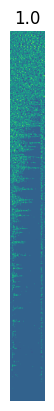

In [ ]:
#show a sample image
batch1 = train_dataset[0]

# get image number 5

img = batch1[0][5]
lab = batch1[1][5]

print(img.shape)
plt.imshow(img)
plt.title(lab)
plt.axis('off')
plt.show()

AttributeError: 'DirectoryIterator' object has no attribute 'batch'

In [ ]:
import keras_tuner as kt
from tensorflow import keras

# Function to build the model
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(
        filters=hp.Int('conv_filters', min_value=16, max_value=64, step=16),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(1025, 97, 1)
    ))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperband Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='hyperband_dir',
    project_name='audio_classification'
)

# Run the search
tuner.search(train_dataset, validation_data=validation_dataset, epochs=10, batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters is {best_hps.get('conv_filters')}.
The optimal number of dense units is {best_hps.get('dense_units')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

Reloading Tuner from hyperband_dir/audio_classification/tuner0.json

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
32                |48                |conv_filters
192               |192               |dense_units
0.001             |0.0001            |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 164, in _t

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py", line 430, in _build_hypermodel
    model = super()._build_hypermodel(hp)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 155, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "<ipython-input-43-f6424b9159c7>", line 15, in build_model
    model.add(keras.layers.Dense(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 121, in add
    self._maybe_rebuild()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 140, in _maybe_rebuild
    self.build(input_shape)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 226, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 186, in build
    x = layer(x)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/random.py", line 34, in uniform
    return tf.random.stateless_uniform(
tensorflow.python.framework.errors_impl.ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul] name: 


In [ ]:
# model

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model = keras.models.Sequential([
    # First Convolutional Block
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(1025, 97, 1),  kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),

    # Second Convolutional Block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),

    # Third Convolutional Block
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),

    # Flatten and Dense Layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),  # Reduced to 128 neurons
    keras.layers.Dropout(0.5),                  # Higher dropout rate
    keras.layers.Dense(1, activation='sigmoid') # Binary classification
])


# model = keras.models.Sequential([
# keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
# keras.layers.MaxPooling2D(pool_size=2, strides=2),

# keras.layers.Conv2D(128, (3,3), activation='relu'),
# keras.layers.MaxPooling2D(pool_size=2, strides=2),

# keras.layers.Conv2D(256, (3,3), activation='relu'),
# keras.layers.MaxPooling2D(pool_size=2, strides=2),

# keras.layers.Conv2D(512, (3,3), activation='relu'),
# keras.layers.MaxPooling2D(pool_size=2, strides=2),

# keras.layers.Flatten(),
# keras.layers.Dense(1024, activation='relu'),

# keras.layers.Dense(1, activation='sigmoid') ])

model.compile(loss='BinaryCrossentropy', optimizer=optimizer, metrics=['accuracy'])

# stepsPerEpochs = np.ceil(train_dataset.samples / batchSize)
# validationSteps = np.ceil(validation_dataset.samples / batchSize)

# best_model_file = "/content/drive/My Drive/Pandoo/Fall 2024/Project/Audio-Mijor-Minor.h5"
best_model_file = "/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/best_model.keras"
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
stepsPerEpochs = stepsPerEpochs.astype(int)

In [ ]:
validationSteps = validationSteps.astype(int)

In [ ]:

# train the model

history = model.fit(train_dataset,

          epochs=50,
          validation_data=validation_dataset,

          callbacks=[best_model])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5143 - loss: 0.8323
Epoch 1: val_accuracy improved from -inf to 0.58480, saving model to /content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 304s 10s/step - accuracy: 0.5155 - loss: 0.8291 - val_accuracy: 0.5848 - val_loss: 0.6825
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5757 - loss: 0.6994
Epoch 2: val_accuracy did not improve from 0.58480
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - accuracy: 0.5747 - loss: 0.6993 - val_accuracy: 0.5848 - val_loss: 0.6867
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.6162 - loss: 0.6721
Epoch 3: val_accuracy did not improve from 0.58480
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.6147 - loss: 0.6726 - val_accuracy: 0.5848 - val_loss: 0.6920
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.5853 - loss: 0.6872
Epoch 4: val_accuracy did not improve from 0.58480
22/22 ━━━━━━━━━

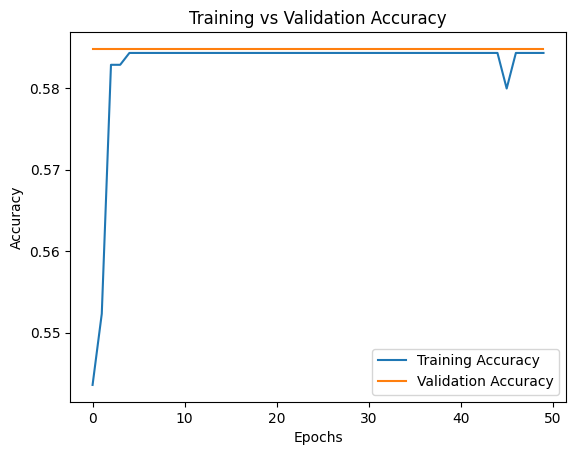

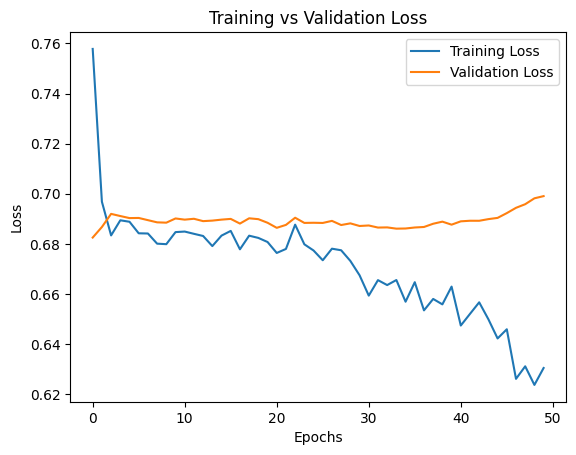

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'][0:100], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'][0:100], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
!pip install sounddevice

In [ ]:
!pip install PortAudio

In [ ]:
# import sounddevice as sd
from tensorflow.keras.utils import img_to_array
import librosa

In [ ]:
def prepareAudio(pathForAudio):
    y , sr = librosa.load(pathForAudio)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)
    ImageAudio = (S_db * 255).astype(np.uint8)

    resizedImage = cv2.resize(ImageAudio,shape,interpolation=cv2.INTER_AREA)

    imgResult = img_to_array(resizedImage)
    imgResult = np.expand_dims(imgResult, axis=0)
    imgResult = imgResult / 255.

    return imgResult

In [ ]:
testAudio = "C:/Data-Sets/Musical Chord Classification/Audio_Files/Minor/Minor_14.wav"

In [ ]:
# define consistnet shape and batch size.
shape = (1025,97)
batchSize = 32

# imageGenerator = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2,
#     rotation_range=10,
#     width_shift_range=0.05,
#     height_shift_range=0.05,
#     zoom_range=0.1,
#     horizontal_flip=False,
#     fill_mode='nearest'
# )


In [ ]:
# import os
# import shutil
# import random

# # Define paths
# major_images_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Major_Images"
# minor_images_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Minor_Images"

# test_major_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/Major"
# test_minor_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/Minor"

# # Ensure the Test subdirectories exist
# os.makedirs(test_major_path, exist_ok=True)
# os.makedirs(test_minor_path, exist_ok=True)

# def move_files_randomly(source_dir, dest_dir, test_ratio=0.2):
#     """
#     Moves a random subset of files from the source directory to the destination directory.
#     test_ratio: Proportion of files to move.
#     """
#     if len(os.listdir(dest_dir)) > 0:
#         print(f"Files already exist in {dest_dir}. Skipping move to prevent duplicates.")
#         return

#     # List all image files in the source directory
#     files = [f for f in os.listdir(source_dir) if f.endswith('.png')]
#     random.shuffle(files)  # Shuffle the list to ensure randomness

#     # Calculate the number of files to move
#     num_to_move = int(len(files) * test_ratio)
#     print(f"Moving {num_to_move} files from {source_dir} to {dest_dir}...")

#     # Move the selected files
#     for file in files[:num_to_move]:
#         src_path = os.path.join(source_dir, file)
#         dest_path = os.path.join(dest_dir, file)
#         shutil.move(src_path, dest_path)

#     print(f"Moved {num_to_move} files to {dest_dir}")

# # Move files for Major and Minor spectrograms
# move_files_randomly(major_images_path, test_major_path, test_ratio=0.2)
# move_files_randomly(minor_images_path, test_minor_path, test_ratio=0.2)

In [ ]:
# test_major_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/Major"
# test_minor_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/Minor"

# # Count the files in Test/Major and Test/Minor
# test_major_files = len([f for f in os.listdir(test_major_path) if f.endswith('.png')])
# test_minor_files = len([f for f in os.listdir(test_minor_path) if f.endswith('.png')])

# print(f"Files in Test/Major: {test_major_files}")
# print(f"Files in Test/Minor: {test_minor_files}")

In [ ]:
'''
ImageDataGenerator preprocesses and augment images.
rescaling is done to normalize pixel values from [0,1]
batch size is number of training samples (images) that are passed through the model before the model's weights are updated
mini-batch GD: model updates weights after 32 images
688 images / 32 = 22 iterations per epoch
'''

imageGenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_dataset = imageGenerator.flow_from_directory(directory = "/content/drive/My Drive/Colab Notebooks/Audio_Files/New/",
                                                   batch_size = batchSize, target_size = shape, subset="training", shuffle= True, color_mode = "grayscale",
                                                   class_mode="binary"
                                                   )

val_dataset = imageGenerator.flow_from_directory(directory = "/content/drive/My Drive/Colab Notebooks/Audio_Files/New/",
                                                   batch_size = batchSize, target_size = shape, subset="validation", shuffle = False, color_mode="grayscale",
                                                   class_mode="binary"
                                                )


In [ ]:
# Debug counts
print(f"Training samples (via generator): {train_dataset.samples}")
print(f"Validation samples (via generator): {val_dataset.samples}")

# Inspect the class indices
print(f"Class indices (via generator): {train_dataset.class_indices}")

In [ ]:
print(f"Class indices: {train_dataset.class_indices}")
print(f"Classes in batches: {train_dataset.classes}")
print(f"Number of batches: {len(train_dataset)}")

In [ ]:
import numpy as np

major_count = np.sum(train_dataset.classes == 0)
minor_count = np.sum(train_dataset.classes == 1)

print(f"Number of Major Images: {major_count}")
print(f"Number of Minor Images: {minor_count}")

In [ ]:
# test_imageGenerator = ImageDataGenerator(rescale=1./255)

# test_dataset = test_imageGenerator.flow_from_directory(
#     directory="/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/",
#     batch_size=batchSize,
#     target_size=shape,
#     color_mode="grayscale",
#     class_mode="binary",
#     shuffle=False  # Shuffle should be off for test data
# )

In [ ]:
import matplotlib.pyplot as plt

# Inspect a few samples from the training dataset
for i in range(5):  # Adjust the range as needed
    img, label = train_dataset[0][0][i], train_dataset[0][1][i]
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Label: {'Major' if label == 0 else 'Minor'}")
    plt.show()

In [ ]:
print(f"Number of validation samples: {val_dataset.samples}")
# stepsperepoch = int(np.ceil(train_dataset.samples / batchSize))
# print(stepsperepoch)
# validation_steps = int(np.ceil(val_dataset.samples / batchSize))
# print(validation_steps)

In [ ]:
for batch in val_dataset:
    print("Validation batch shape:", batch[0][0].shape)
    break

In [ ]:
batch1 = train_dataset[0]
# image 5
image5 = batch1[0][5]
label = batch1[1][5]
print(image5.shape)
print(label)

In [ ]:
print(train_dataset.class_indices)
print(val_dataset.class_indices)

In [ ]:
#model
# Adaptive Moment Estimation
import matplotlib.pyplot as plt

optimizer = keras.optimizers.Adam(learning_rate=.01)
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=[1025, 97, 1]),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),


    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),

    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])


model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

stepsperepoch = int(np.ceil(train_dataset.samples / batchSize))

validation_steps = int(np.ceil(val_dataset.samples / batchSize))


best_model_path = '/content/drive/My Drive/Colab Notebooks/Audio_Files/best_model.keras'
best_model = ModelCheckpoint(best_model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# early_stopping = EarlyStopping(
#     monitor='val_loss',    # Metric to monitor (e.g., 'val_loss' or 'val_accuracy')
#     patience=3,            # Number of epochs with no improvement after which training will be stopped
#     restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
#     mode='min'             # 'min' for minimizing 'val_loss', 'max' for maximizing 'val_accuracy'
# )

history = model.fit(train_dataset, epochs=5, steps_per_epoch=stepsperepoch, validation_data=val_dataset, validation_steps=validation_steps, callbacks=[best_model])


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [ ]:
print(f"Training samples: {train_dataset.samples}")
print(f"Validation samples: {val_dataset.samples}")
print(f"Batch size: {batchSize}")
print(f"Steps per epoch: {stepsperepoch}")
print(f"Validation steps: {validation_steps}")
print(f"Number of training batches: {len(train_dataset)}")
print(f"Number of validation batches: {len(val_dataset)}")

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
best_model_path = '/content/drive/My Drive/Colab Notebooks/Audio_Files/best_model.keras'
model = load_model(best_model_path)

# Summary of the model
model.summary()

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the last epoch's training accuracy
print("Final training accuracy:", train_accuracy[-1])

# Plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()